In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [132]:
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Correlation Table to find interesting corr
We try to identify interesting numerical variables by correlation. 
We decide that particularly correlations above 0.5 or below -0.5 indicate feature we'd like to take a close look at.

### To be considered
(1) This only helps to identify numerical and continous features of interest 
(2) Features like OverallQual are actually discrete scales from 1 to 10 and are therefore categorical variables. Their correlation cannot be compared to the correlation of others. Even more obvious this is true for years.

In [115]:
df.corr()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePriceAdjusted
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,...,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,-0.017942
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.073959
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,0.257320
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,0.817184
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,-0.036868
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,0.586570
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,0.565608
MasVnrArea,-0.050298,0.022936,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493,0.430809
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,0.372023
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378,0.004832


### HEATMAP

<AxesSubplot:>

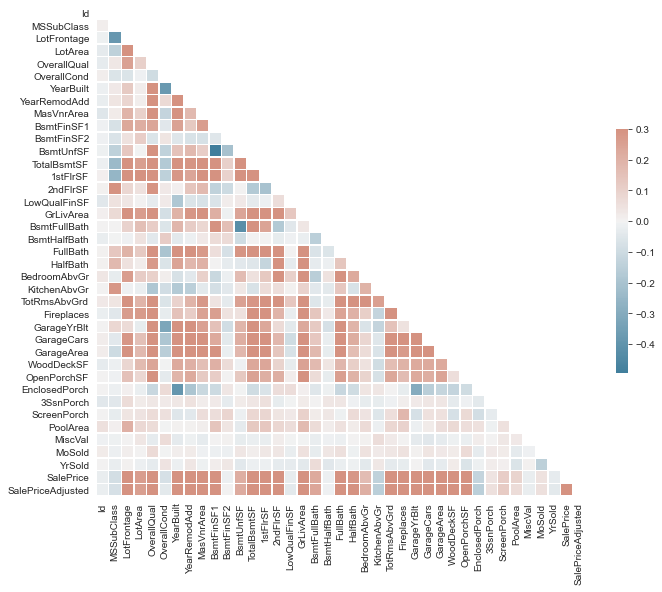

In [130]:
corr = df.corr() #just need a multi column Data Frame

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### CORRELATION WITH SALEPRICE

In [118]:

correlation=df.corrwith(df['SalePrice'], axis=0, drop=False, method='pearson')
correlation

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
dtype: float

#### selected correlations

In [124]:
of_interest=list(correlation[(correlation>0.5) | (correlation<-0.5) ].index)
print(of_interest)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']


# Nonnumerical or categorical variables we find interesting
'Neighborhood', 'ExterCond', 'Heating', 'HeatingQC' , 'CentralAir' ,
'Garage Type', 'SaleType', 'YearBuilt', 'YearRemodAdd','OverallQual'


In [15]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

# Inspect distribution of sales price
### FIXING SKEWD DISTRIBUTION

/Users/spitzer/opt/anaconda3/envs/kittycat/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

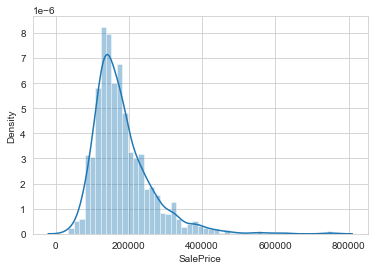

In [127]:
sns.set_style("whitegrid")
sns.distplot(df['SalePrice'])

/Users/spitzer/opt/anaconda3/envs/kittycat/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePriceAdjusted', ylabel='Density'>

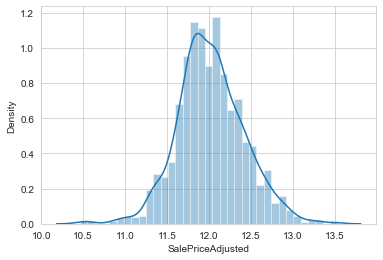

In [128]:

df['SalePriceAdjusted']=np.log(df['SalePrice'])
sns.set_style("whitegrid")
sns.distplot(df['SalePriceAdjusted'])

## REMOVE COLUMNS WITH LOTS OF MISSING VALUES
### drop columns with 10%or more  missing values

In [18]:
df.isnull().sum()*100/len(df)

Id                    0.000000
MSSubClass            0.000000
MSZoning              0.000000
LotFrontage          17.739726
LotArea               0.000000
                       ...    
YrSold                0.000000
SaleType              0.000000
SaleCondition         0.000000
SalePrice             0.000000
SalePriceAdjusted     0.000000
Length: 82, dtype: float64

In [19]:
percent_missing=df.isnull().sum()*100/len(df)
missing_value_df=pd.DataFrame({'column_name':df.columns,'percent_missing':percent_missing})
bad=missing_value_df[missing_value_df['percent_missing']>10]
bad

,column_name,percent_missing
LotFrontage,LotFrontage,17.739726
Alley,Alley,93.767123
FireplaceQu,FireplaceQu,47.260274
PoolQC,PoolQC,99.520548
Fence,Fence,80.753425
MiscFeature,MiscFeature,96.301370


In [20]:
df.drop(list(bad.index),axis=1,inplace=True)

## FEATURE REDUCTION

In [50]:
#dataframe with numeric and categorical columns we are intested

interest = df[['YearBuilt','GarageArea','GrLivArea','Neighborhood', 'OverallQual', 'CentralAir' , 'SaleType','SalePrice','SalePriceAdjusted']]
interest

#0.7 GrLivArea
#0.79 OverallQual (Scale 10 to 1)
#GarageCars 0.64
#Garage Areas 0.62
#TotalBsmtSF 0.6
#1stFlrSF 605852

,YearBuilt,GarageArea,GrLivArea,Neighborhood,OverallQual,CentralAir,SaleType,SalePrice,SalePriceAdjusted
0,2003,548,1710,CollgCr,7,Y,WD,208500,12.247694
1,1976,460,1262,Veenker,6,Y,WD,181500,12.109011
2,2001,608,1786,CollgCr,7,Y,WD,223500,12.317167
3,1915,642,1717,Crawfor,7,Y,WD,140000,11.849398
4,2000,836,2198,NoRidge,8,Y,WD,250000,12.429216
...,...,...,...,...,...,...,...,...,...
1455,1999,460,1647,Gilbert,6,Y,WD,175000,12.072541
1456,1978,500,2073,NWAmes,6,Y,WD,210000,12.254863
1457,1941,252,2340,Crawfor,7,Y,WD,266500,12.493130
1458,1950,240,1078,NAmes,5,Y,WD,142125,11.864462


## Continuous and Linear Variable

In [51]:

X = interest[['GarageArea','GrLivArea','YearBuilt']]
Y= interest['SalePrice']
X = sm.add_constant(X)
model = sm.OLS (Y, X)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1052.
Date:                Sat, 14 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:10:20   Log-Likelihood:                -17702.
No. Observations:                1460   AIC:                         3.541e+04
Df Residuals:                    1456   BIC:                         3.543e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.585e+06   8.58e+04    -18.484      0.000   -1.75e+06   -1.42e+06
GarageArea    81.8705      6.919     11.833      0.000      68.298      95.443
GrLivArea     82.2063      2.522     32.599      0.000      77.260      87.153
YearBuilt    813.1579     44.142     18.421      0.000     726.569     899.747
==============================================================================
Omnibus:                      376.432   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15318.540
Skew:                           0.419   Prob(JB):                         0.00
Kurtosis:                      18.846   Cond. No.                     1.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
# Sales Prize Adjusted gae us odd results in the resulats table

<Figure size 1440x720 with 0 Axes>

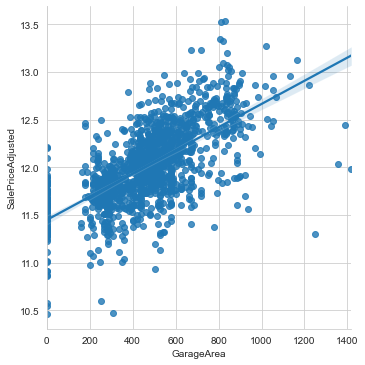

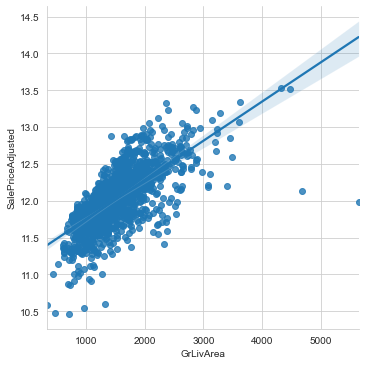

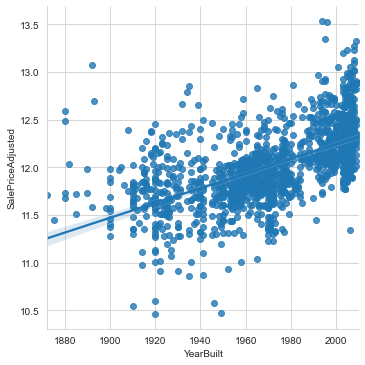

In [129]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.lmplot(data=interest, x='GarageArea',y='SalePriceAdjusted',fit_reg=True)
sns.lmplot(data=interest, x='GrLivArea',y='SalePriceAdjusted',fit_reg=True)
sns.lmplot(data=interest, x='YearBuilt',y='SalePriceAdjusted',fit_reg=True)



In [ ]:
# Problem with Garage Size: There are a lot of housess with Garage Area Zero
# Should we ignore all houses without Garage???

### Convert categorical data to numerical.

#### Neighborhood

In [70]:
interest['Neighborhood'].value_counts().index

Index(['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'Gilbert',
       'NridgHt', 'Sawyer', 'NWAmes', 'SawyerW', 'BrkSide', 'Crawfor',
       'Mitchel', 'NoRidge', 'Timber', 'IDOTRR', 'ClearCr', 'SWISU', 'StoneBr',
       'MeadowV', 'Blmngtn', 'BrDale', 'Veenker', 'NPkVill', 'Blueste'],
      dtype='object')

In [106]:
#sort neighborhood by avg price
price = pd.pivot_table(interest,index=['Neighborhood'], values=['SalePrice'], aggfunc=[np.mean])
price

,mean
,SalePrice
Neighborhood,
Blmngtn,194870.882353
Blueste,137500.000000
BrDale,104493.750000
BrkSide,124834.051724
ClearCr,212565.428571
CollgCr,197965.773333
Crawfor,210624.725490
Edwards,128219.700000


In [ ]:
### X = pd.get_dummies(interest['Neighborhood'])
X = X.drop('MeadowV', axis=1)
X
#Blmngtn dropped

In [111]:
Y= interest['SalePrice']
X = sm.add_constant(X)
model = sm.OLS (Y, X)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     71.78
Date:                Sat, 14 Nov 2020   Prob (F-statistic):          1.56e-225
Time:                        12:04:54   Log-Likelihood:                -17968.
No. Observations:                1460   AIC:                         3.599e+04
Df Residuals:                    1435   BIC:                         3.612e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.858e+04   1.31e+04      7.527      0.000    7.29e+04    1.24e+05
Blmngtn     9.629e+04   1.85e+04      5.199      0.000       6e+04    1.33e+05
Blueste     3.892e+04   4.04e+04      0.964      0.335   -4.03e+04    1.18e+05
BrDale      5917.2794   1.88e+04      0.315      0.753    -3.1e+04    4.28e+04
BrkSide     2.626e+04   1.49e+04      1.763      0.078   -2956.515    5.55e+04
ClearCr      1.14e+05   1.66e+04      6.866      0.000    8.14e+04    1.47e+05
CollgCr     9.939e+04   1.38e+04      7.192      0.000    7.23e+04    1.26e+05
Crawfor      1.12e+05   1.51e+04      7.409      0.000    8.24e+04    1.42e+05
Edwards     2.964e+04   1.42e+04      2.093      0.037    1854.496    5.74e+04
Gilbert     9.428e+04   1.44e+04      6.530      0.000     6.6e+04    1.23e+05
IDOTRR      1547.3132   1.58e+04      0.098      0.922   -2.95e+04    3.26e+04
Mitchel     5.769e+04   1.52e+04      3.796      0.000    2.79e+04    8.75e+04
NAmes       4.727e+04   1.36e+04      3.480      0.001    2.06e+04    7.39e+04
NPkVill     4.412e+04   2.23e+04      1.982      0.048     452.193    8.78e+04
NWAmes      9.047e+04   1.45e+04      6.222      0.000    6.19e+04    1.19e+05
NoRidge     2.367e+05   1.56e+04     15.197      0.000    2.06e+05    2.67e+05
NridgHt     2.177e+05   1.45e+04     15.044      0.000    1.89e+05    2.46e+05
OldTown     2.965e+04    1.4e+04      2.111      0.035    2093.332    5.72e+04
SWISU       4.401e+04    1.7e+04      2.593      0.010    1.07e+04    7.73e+04
Sawyer      3.822e+04   1.45e+04      2.631      0.009    9727.438    6.67e+04
SawyerW     8.798e+04   1.49e+04      5.919      0.000    5.88e+04    1.17e+05
Somerst     1.268e+05   1.43e+04      8.847      0.000    9.87e+04    1.55e+05
StoneBr     2.119e+05    1.7e+04     12.484      0.000    1.79e+05    2.45e+05
Timber      1.437e+05   1.58e+04      9.118      0.000    1.13e+05    1.75e+05
Veenker     1.402e+05   2.09e+04      6.710      0.000    9.92e+04    1.81e+05
==============================================================================
Omnibus:                      618.883   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5526.438
Skew:                           1.737   Prob(JB):                         0.00
Kurtosis:                      11.875   Cond. No.                         48.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Convert binary data to numerical.

In [47]:
#Central Air  Y/N to 0 /1

interest['CentralAir']=np.where(interest['CentralAir']=='Y',1,0)

<ipython-input-47-47be574f6871>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interest['CentralAir']=np.where(interest['CentralAir']=='Y',1,0)


In [23]:
interest['CentralAir'].value_counts()

1    1365
0      95
Name: CentralAir, dtype: int64

In [ ]:

X = df ['MinutesOfBeingAwake']
X = sm.add_constant(X)

model = sm.Logit (Y, X)
results=model.fit()
results.summary()